In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


import os
import glob
from pathlib import Path

from collections import Counter
from itertools import cycle, islice

from PIL import Image
from sys import argv
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
path = "merged_weather_data_CSV"

In [4]:
dft = pd.read_csv(f"{path}/Combined_CC_ECA_cloud_cover.csv")
dft

SOUID        DATE  CC  Q_CC  STAID          SOUNAME        LAT  \
0       240746  2017-01-01   8     0    204        BIALYSTOK  53.107222   
1       240746  2017-01-02   7     0    204        BIALYSTOK  53.107222   
2       240746  2017-01-03   7     0    204        BIALYSTOK  53.107222   
3       240746  2017-01-04   8     0    204        BIALYSTOK  53.107222   
4       240746  2017-01-05   6     0    204        BIALYSTOK  53.107222   
...        ...         ...  ..   ...    ...              ...        ...   
173471  240267  2021-12-27   2     0  25151  ELBLAG-MILEJEWO  54.223056   
173472  240267  2021-12-28   4     0  25151  ELBLAG-MILEJEWO  54.223056   
173473  240267  2021-12-29   8     0  25151  ELBLAG-MILEJEWO  54.223056   
173474  240267  2021-12-30   8     0  25151  ELBLAG-MILEJEWO  54.223056   
173475  240267  2021-12-31   8     0  25151  ELBLAG-MILEJEWO  54.223056   

              LON  
0       23.162222  
1       23.162222  
2       23.162222  
3       23.162222  
4       23.162222  
...           ...  
173471  19.543611  
173472  19.543611  
173473  19.543611  
173474  19.543611  
173475  19.543611  

[173476 rows x 8 columns]

In [5]:
df = pd.read_csv(f"{path}/Combined_Merged_Weather_Data.csv")
df

SOUID        DATE  CC  Q_CC  STAID          SOUNAME        LAT  \
0      240746  2017-01-03   7     0    204        BIALYSTOK  53.107222   
1      240746  2017-01-05   6     0    204        BIALYSTOK  53.107222   
2      240746  2017-01-06   1     0    204        BIALYSTOK  53.107222   
3      240746  2017-01-07   2     0    204        BIALYSTOK  53.107222   
4      240746  2017-01-08   6     0    204        BIALYSTOK  53.107222   
...       ...         ...  ..   ...    ...              ...        ...   
43293  240267  2021-12-27   2     0  25151  ELBLAG-MILEJEWO  54.223056   
43294  240267  2021-12-28   4     0  25151  ELBLAG-MILEJEWO  54.223056   
43295  240267  2021-12-29   8     0  25151  ELBLAG-MILEJEWO  54.223056   
43296  240267  2021-12-30   8     0  25151  ELBLAG-MILEJEWO  54.223056   
43297  240267  2021-12-31   8     0  25151  ELBLAG-MILEJEWO  54.223056   

             LON  FG  Q_FG  ...  QQ  Q_QQ   RR  Q_RR  SD  Q_SD  SS  Q_SS   TG  \
0      23.162222   0     0  ...  18     0    0     0   1     0   7     0  -14   
1      23.162222   0     0  ...  20     0    0     0  16     0   9     0 -108   
2      23.162222  25     0  ...  48     0    0     0  16     0  71     0 -174   
3      23.162222   0     0  ...  45     0    0     0  15     0  61     0 -178   
4      23.162222  10     0  ...  33     0    0     0  15     0  32     0 -125   
...          ...  ..   ...  ...  ..   ...  ...   ...  ..   ...  ..   ...  ...   
43293  19.543611   0     0  ...  39     0    0     0  13     0  67     0  -99   
43294  19.543611  61     0  ...  17     0    0     0  13     0   7     0  -87   
43295  19.543611   0     0  ...   9     0    0     0  13     0   0     0  -37   
43296  19.543611  51     0  ...   9     0    1     0  12     0   0     0    5   
43297  19.543611  58     0  ...  10     0  144     0   3     0   0     0   63   

       Q_TG  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
43293     0  
43294     0  
43295     0  
43296     0  
43297     0  

[43298 rows x 24 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43298 entries, 0 to 43297
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SOUID    43298 non-null  int64  
 1   DATE     43298 non-null  object 
 2   CC       43298 non-null  int64  
 3   Q_CC     43298 non-null  int64  
 4   STAID    43298 non-null  int64  
 5   SOUNAME  43298 non-null  object 
 6   LAT      43298 non-null  float64
 7   LON      43298 non-null  float64
 8   FG       43298 non-null  int64  
 9   Q_FG     43298 non-null  int64  
 10  HU       43298 non-null  int64  
 11  Q_HU     43298 non-null  int64  
 12  PP       43298 non-null  int64  
 13  Q_PP     43298 non-null  int64  
 14  QQ       43298 non-null  int64  
 15  Q_QQ     43298 non-null  int64  
 16  RR       43298 non-null  int64  
 17  Q_RR     43298 non-null  int64  
 18  SD       43298 non-null  int64  
 19  Q_SD     43298 non-null  int64  
 20  SS       43298 non-null  int64  
 21  Q_SS     432

In [9]:
df

SOUID        DATE  CC  Q_CC  STAID          SOUNAME        LAT  \
0      240746  2017-01-03   7     0    204        BIALYSTOK  53.107222   
1      240746  2017-01-05   6     0    204        BIALYSTOK  53.107222   
2      240746  2017-01-06   1     0    204        BIALYSTOK  53.107222   
3      240746  2017-01-07   2     0    204        BIALYSTOK  53.107222   
4      240746  2017-01-08   6     0    204        BIALYSTOK  53.107222   
...       ...         ...  ..   ...    ...              ...        ...   
43293  240267  2021-12-27   2     0  25151  ELBLAG-MILEJEWO  54.223056   
43294  240267  2021-12-28   4     0  25151  ELBLAG-MILEJEWO  54.223056   
43295  240267  2021-12-29   8     0  25151  ELBLAG-MILEJEWO  54.223056   
43296  240267  2021-12-30   8     0  25151  ELBLAG-MILEJEWO  54.223056   
43297  240267  2021-12-31   8     0  25151  ELBLAG-MILEJEWO  54.223056   

             LON  FG  Q_FG  ...  QQ  Q_QQ   RR  Q_RR  SD  Q_SD  SS  Q_SS   TG  \
0      23.162222   0     0  ...  18     0    0     0   1     0   7     0  -14   
1      23.162222   0     0  ...  20     0    0     0  16     0   9     0 -108   
2      23.162222  25     0  ...  48     0    0     0  16     0  71     0 -174   
3      23.162222   0     0  ...  45     0    0     0  15     0  61     0 -178   
4      23.162222  10     0  ...  33     0    0     0  15     0  32     0 -125   
...          ...  ..   ...  ...  ..   ...  ...   ...  ..   ...  ..   ...  ...   
43293  19.543611   0     0  ...  39     0    0     0  13     0  67     0  -99   
43294  19.543611  61     0  ...  17     0    0     0  13     0   7     0  -87   
43295  19.543611   0     0  ...   9     0    0     0  13     0   0     0  -37   
43296  19.543611  51     0  ...   9     0    1     0  12     0   0     0    5   
43297  19.543611  58     0  ...  10     0  144     0   3     0   0     0   63   

       Q_TG  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
43293     0  
43294     0  
43295     0  
43296     0  
43297     0  

[43298 rows x 24 columns]

In [19]:
source_names =  df["SOUNAME"].unique().tolist()
source_names

['BIALYSTOK',
 'HEL',
 'RZESZOW JASIONKA',
 'SZCZECIN',
 'ELBLAG',
 'TERESPOL',
 'LESZNO',
 'WIELUN',
 'SULEJOW',
 'WLODAWA',
 'RACIBORZ',
 'BIELSKO-BIALA',
 'KOSZALIN',
 'CHOJNICE',
 'TORUN',
 'MLAWA',
 'ZIELONA GORA',
 'KLODZKO',
 'KIELCE',
 'KOZIENCE',
 'JELENIA GORA',
 'CZOSTOCHOWA',
 'TARNOW',
 'SANDOMIERZ',
 'ZAMOSC',
 'LEGNICA',
 'LUBLIN-RADAWIEC',
 'PLOCK',
 'KOLOBRZEG-DZWIRZYNO',
 'ELBLAG-MILEJEWO']

In [150]:
len(source_names)

30

#### Check for unique station IDs and source names

#### It can be observed from the following that: - 
- All source names has unique station attached to it

In [18]:
#Verify if total number of unique station ID is same as total number of unique station IDs
len(df["SOUNAME"].unique()) == len(df["STAID"].unique())

True

In [29]:
#Further insights on number of unique station IDs for each source names
for name in source_names:
    df_name = df[df["SOUNAME"] == name]
    print(f"Total amount of stations for {name} is {df_name['STAID'].nunique()} and the station(s) is/are \
{df_name['STAID'].unique()}")

Total amout of stations for BIALYSTOK is 1 and the station(s) is/are [204]
Total amout of stations for HEL is 1 and the station(s) is/are [205]
Total amout of stations for RZESZOW JASIONKA is 1 and the station(s) is/are [207]
Total amout of stations for SZCZECIN is 1 and the station(s) is/are [208]
Total amout of stations for ELBLAG is 1 and the station(s) is/are [396]
Total amout of stations for TERESPOL is 1 and the station(s) is/are [922]
Total amout of stations for LESZNO is 1 and the station(s) is/are [923]
Total amout of stations for WIELUN is 1 and the station(s) is/are [924]
Total amout of stations for SULEJOW is 1 and the station(s) is/are [926]
Total amout of stations for WLODAWA is 1 and the station(s) is/are [927]
Total amout of stations for RACIBORZ is 1 and the station(s) is/are [928]
Total amout of stations for BIELSKO-BIALA is 1 and the station(s) is/are [930]
Total amout of stations for KOSZALIN is 1 and the station(s) is/are [2022]
Total amout of stations for CHOJNICE

#### Check for unique source IDs and source names

#### It can be observed from the following that: - 
- some source names has two sources and some has only one

In [30]:
#Verify if total number of unique station ID is same as total number of unique station IDs
len(df["SOUNAME"].unique()) == len(df["SOUID"].unique())

False

In [149]:
count = 0
for name in source_names:
    df_name = df[df["SOUNAME"] == name]
    if df_name['SOUID'].nunique() == 2:
        count += 1
    print(f"Total amount of sources for {name} is {df_name['SOUID'].nunique()} and the station(s) is/are \
{df_name['SOUID'].unique()}")
    
print()
print(count)

Total amount of sources for BIALYSTOK is 2 and the station(s) is/are [240746 912295]
Total amount of sources for HEL is 1 and the station(s) is/are [240748]
Total amount of sources for RZESZOW JASIONKA is 1 and the station(s) is/are [240725]
Total amount of sources for SZCZECIN is 1 and the station(s) is/are [240741]
Total amount of sources for ELBLAG is 1 and the station(s) is/are [240749]
Total amount of sources for TERESPOL is 2 and the station(s) is/are [240739 912399]
Total amount of sources for LESZNO is 1 and the station(s) is/are [240727]
Total amount of sources for WIELUN is 1 and the station(s) is/are [240730]
Total amount of sources for SULEJOW is 1 and the station(s) is/are [240732]
Total amount of sources for WLODAWA is 1 and the station(s) is/are [240733]
Total amount of sources for RACIBORZ is 1 and the station(s) is/are [240723]
Total amount of sources for BIELSKO-BIALA is 2 and the station(s) is/are [240718 912600]
Total amount of sources for KOSZALIN is 1 and the stat

In [32]:
#Define function for plotting bar, pie or box plots
def plot_dist(df, col_name, color):
    """
    Function for plotting based on column name
    Input parameters:- 
    df = dataframe
    col_name = column name
    color = type of plot (pie, box, bar)"""
    
    cmap = cm.get_cmap('RdYlGn')
    
    
    image =  df[col_name].value_counts().plot(kind=color, colormap = cmap)
    sn.distplot(df[col_name].value_counts())
    #image.figure.savefig(f"{col_name}.jpg")
    
    return image

## Check distribution of quality code class for each weather parameter in source names to check for valid, suspect or missing data

### Inference
- Valid observations across all parameters follows similar distributions
- Only 6 of 9 analyzed weather parameters has *Suspect* records with cloud cover and sea level pressure following same distributions as valid observations
- Only 7 of 9 analyzed weather parameters has *Missing* records with less source names

### Zero:Valid 

Plotting bar charts for 0:Valid Cloud Cover


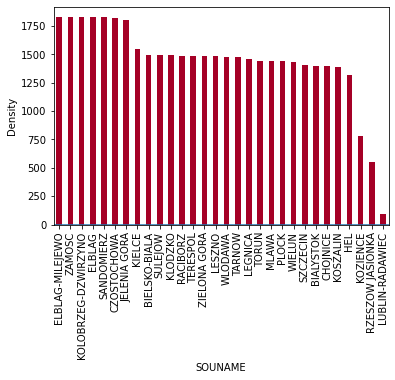

Plotting bar charts for 0:Valid Wind Speed


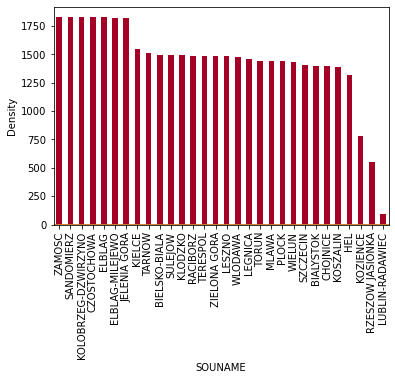

Plotting bar charts for 0:Valid Humidity


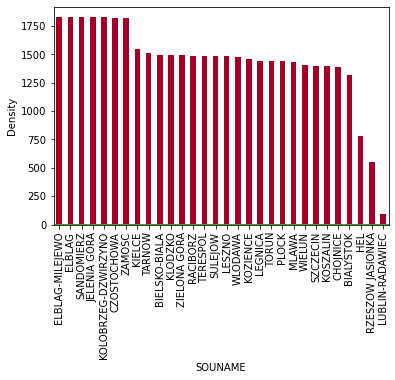

Plotting bar charts for 0:Valid Sea level Pressure


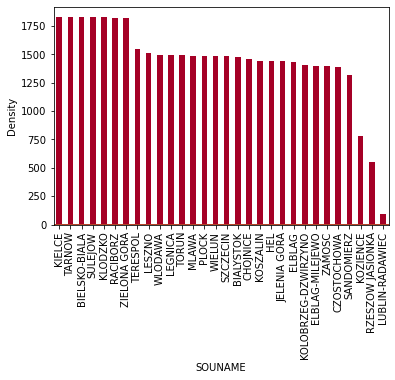

Plotting bar charts for 0:Valid Global Radiation


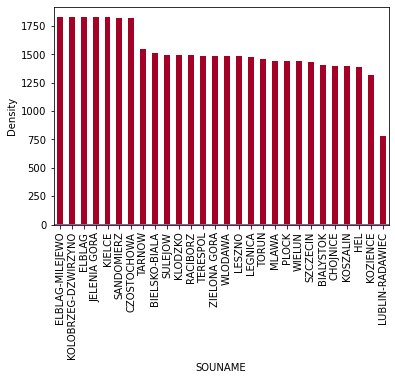

Plotting bar charts for 0:Valid Precipitation


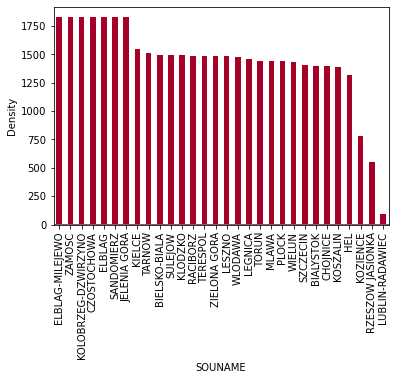

Plotting bar charts for 0:Valid Snow Depth


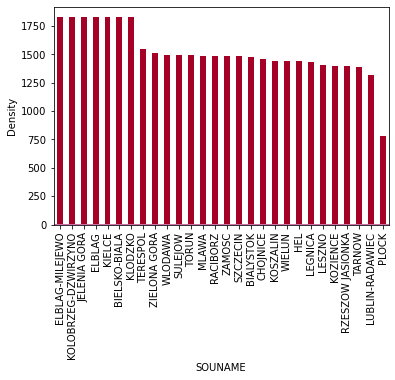

Plotting bar charts for 0:Valid Sunshine


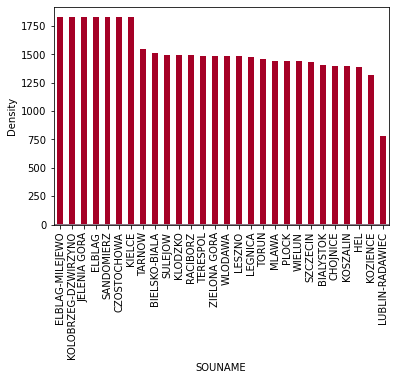

Plotting bar charts for 0:Valid Mean Temperature


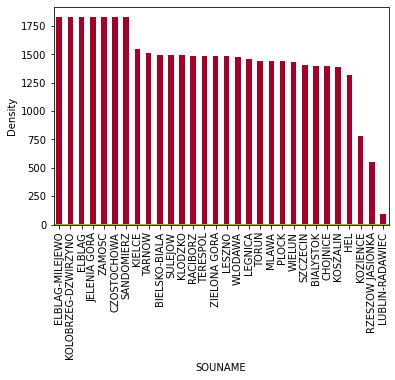

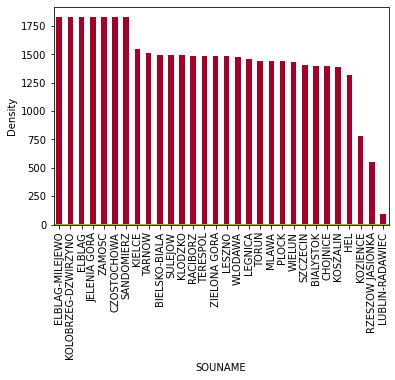

In [61]:
pars_dict = {"CC":"Cloud Cover", "FG":"Wind Speed", "HU":"Humidity", "PP":"Sea level Pressure", 
             "QQ":"Global Radiation", "RR":"Precipitation", "SD":"Snow Depth", "SS":"Sunshine", "TG":"Mean Temperature"}
for p in pars_dict.keys():
    df_zero = df[df[f"Q_{p}"] == 0]
    print(f"Plotting bar charts for 0:Valid {pars_dict[p]}")
    if len(df_zero) != 0:
        img = plot_dist(df_zero, "SOUNAME", "bar")
        display(img.figure)

### 1:Suspect

Plotting bar charts for 9:Missing Cloud Cover, CC
Plotting bar charts for 9:Missing Wind Speed, FG
Plotting bar charts for 9:Missing Humidity, HU


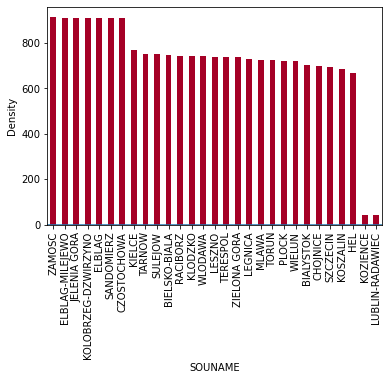

Plotting bar charts for 9:Missing Sea level Pressure, PP


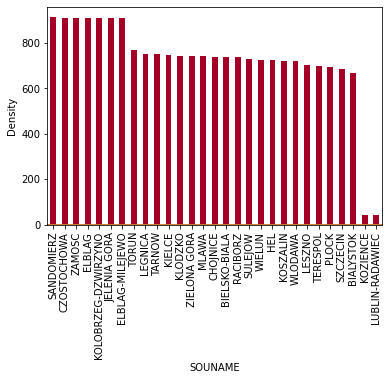

Plotting bar charts for 9:Missing Global Radiation, QQ


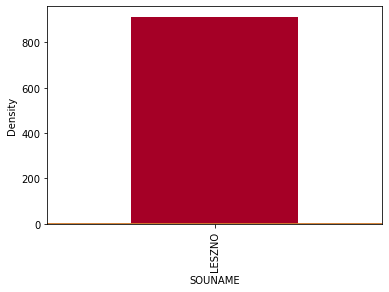

Plotting bar charts for 9:Missing Precipitation, RR
Plotting bar charts for 9:Missing Snow Depth, SD
Plotting bar charts for 9:Missing Sunshine, SS


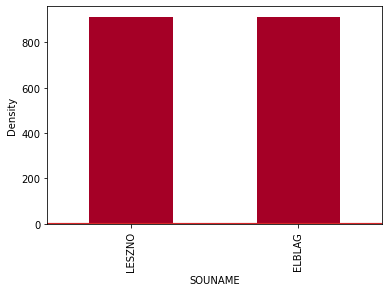

Plotting bar charts for 9:Missing Mean Temperature, TG


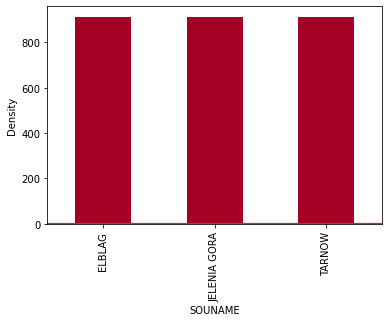

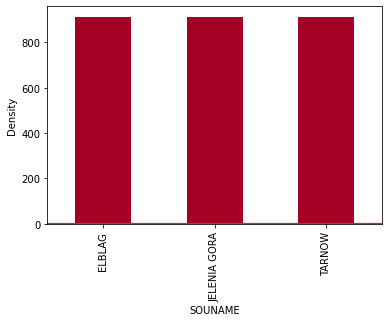

In [62]:
for p in pars_dict.keys():
    df_zero = df[df[f"Q_{p}"] == 1]
    print(f"Plotting bar charts for 9:Missing {pars_dict[p]}, {p}")
    if len(df_zero) != 0:
        img = plot_dist(df_zero, "SOUNAME", "bar")
        display(img.figure)

### 9:Missing 

Plotting bar charts for 9:Missing Cloud Cover, CC


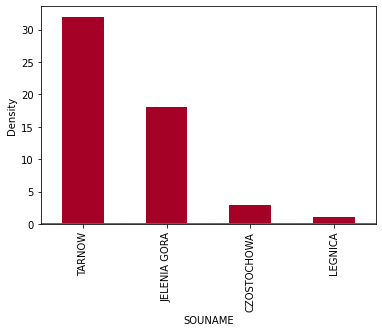

Plotting bar charts for 9:Missing Wind Speed, FG


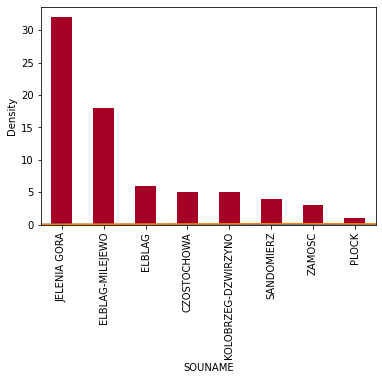

Plotting bar charts for 9:Missing Humidity, HU


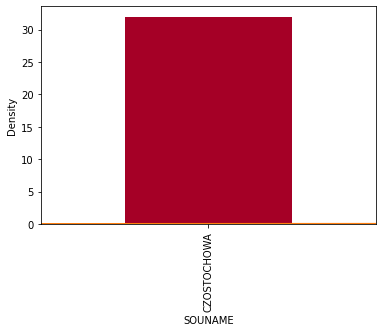

Plotting bar charts for 9:Missing Sea level Pressure, PP


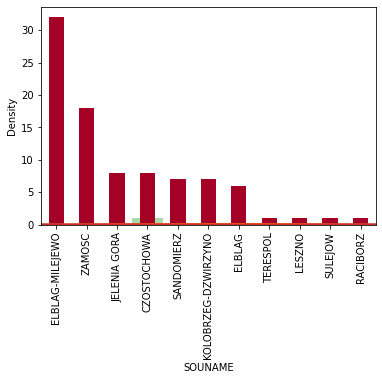

Plotting bar charts for 9:Missing Global Radiation, QQ


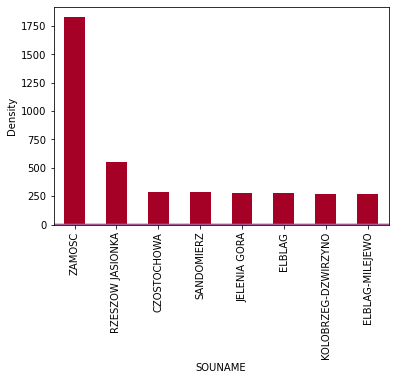

Plotting bar charts for 9:Missing Precipitation, RR
Plotting bar charts for 9:Missing Snow Depth, SD


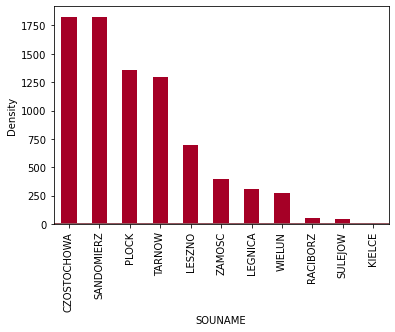

Plotting bar charts for 9:Missing Sunshine, SS


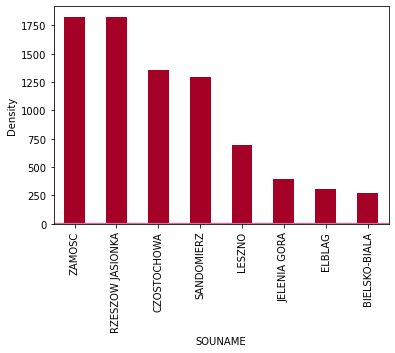

Plotting bar charts for 9:Missing Mean Temperature, TG


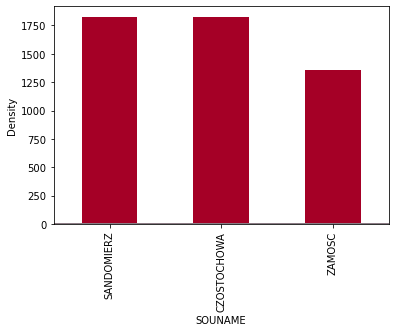

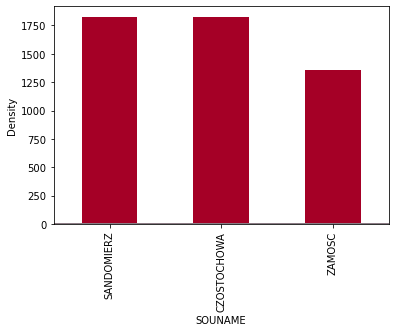

In [63]:
for p in pars_dict.keys():
    df_zero = df[df[f"Q_{p}"] == 9]
    print(f"Plotting bar charts for 9:Missing {pars_dict[p]}, {p}")
    if len(df_zero) != 0:
        img = plot_dist(df_zero, "SOUNAME", "bar")
        display(img.figure)

### Plotting time series of various fields with respect to source names 

### Cloud cover 

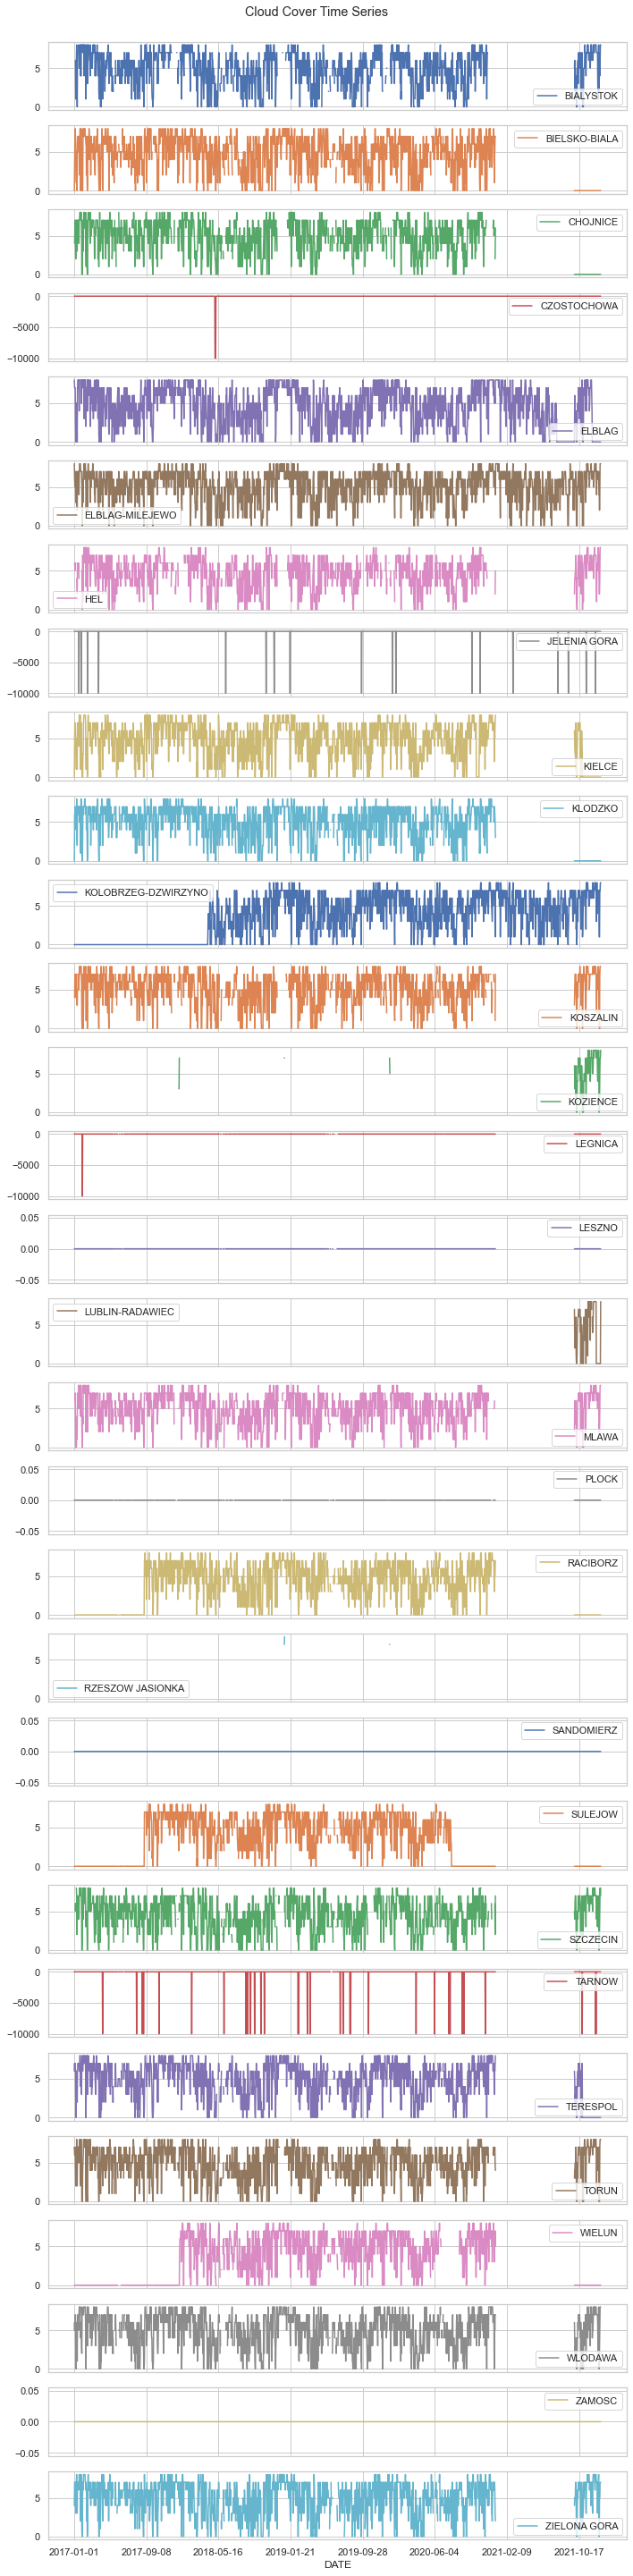

In [125]:
curr = "CC"
df_t = df.copy()
df_t.groupby(['SOUNAME', 'DATE'])[curr].mean().\
        unstack('SOUNAME').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle(f"{pars_dict[curr]} Time Series",  y=1)
plt.tight_layout()

### Wind speed 

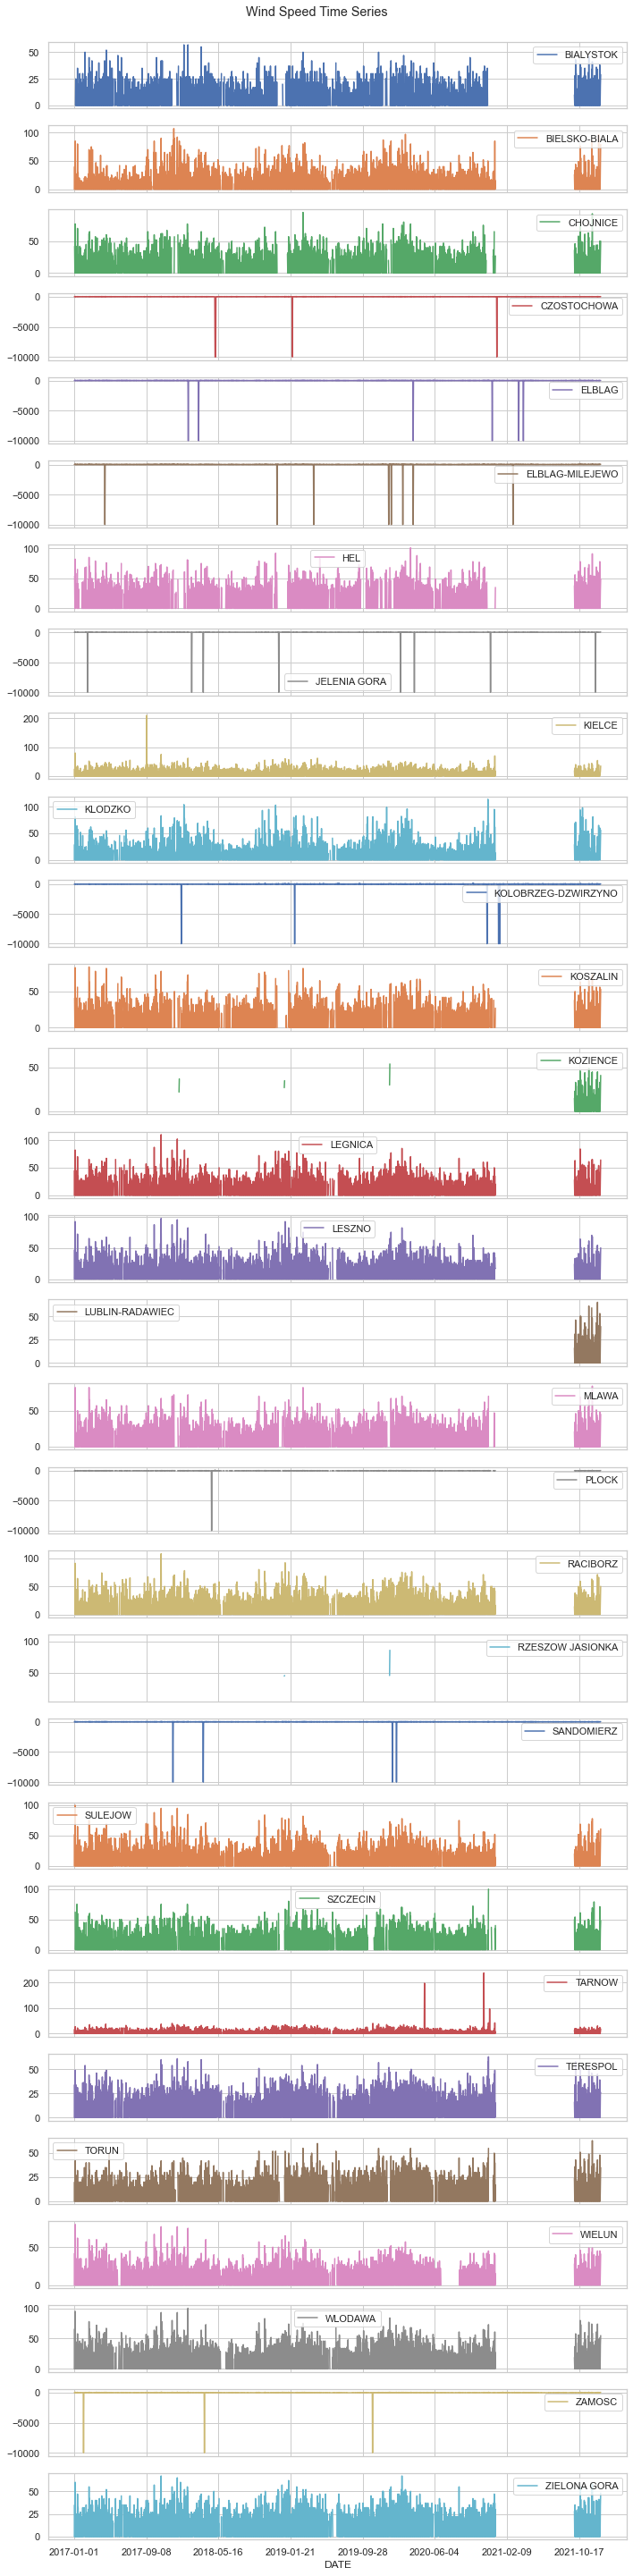

In [126]:
curr = "FG"
df_t = df.copy()
df_t.groupby(['SOUNAME', 'DATE'])[curr].mean().\
        unstack('SOUNAME').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle(f"{pars_dict[curr]} Time Series",  y=1)
plt.tight_layout()

### Humidity 

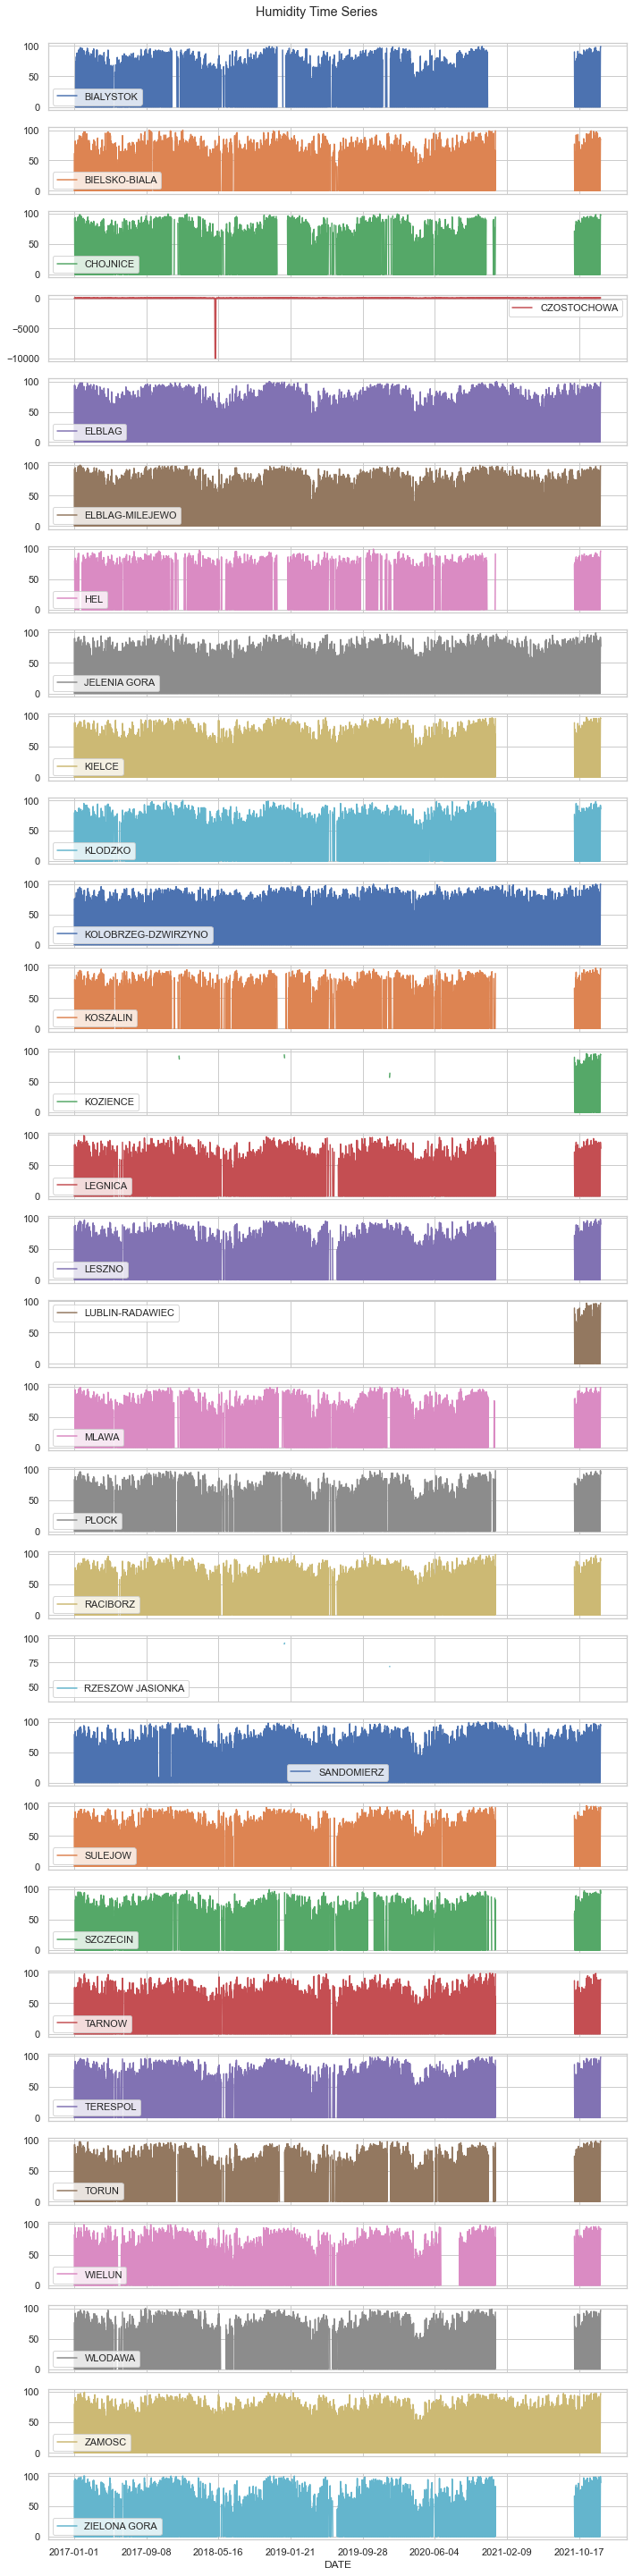

In [127]:
curr = "HU"
df_t = df.copy()
df_t.groupby(['SOUNAME', 'DATE'])[curr].mean().\
        unstack('SOUNAME').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle(f"{pars_dict[curr]} Time Series",  y=1)
plt.tight_layout()

### Sea level Pressure 

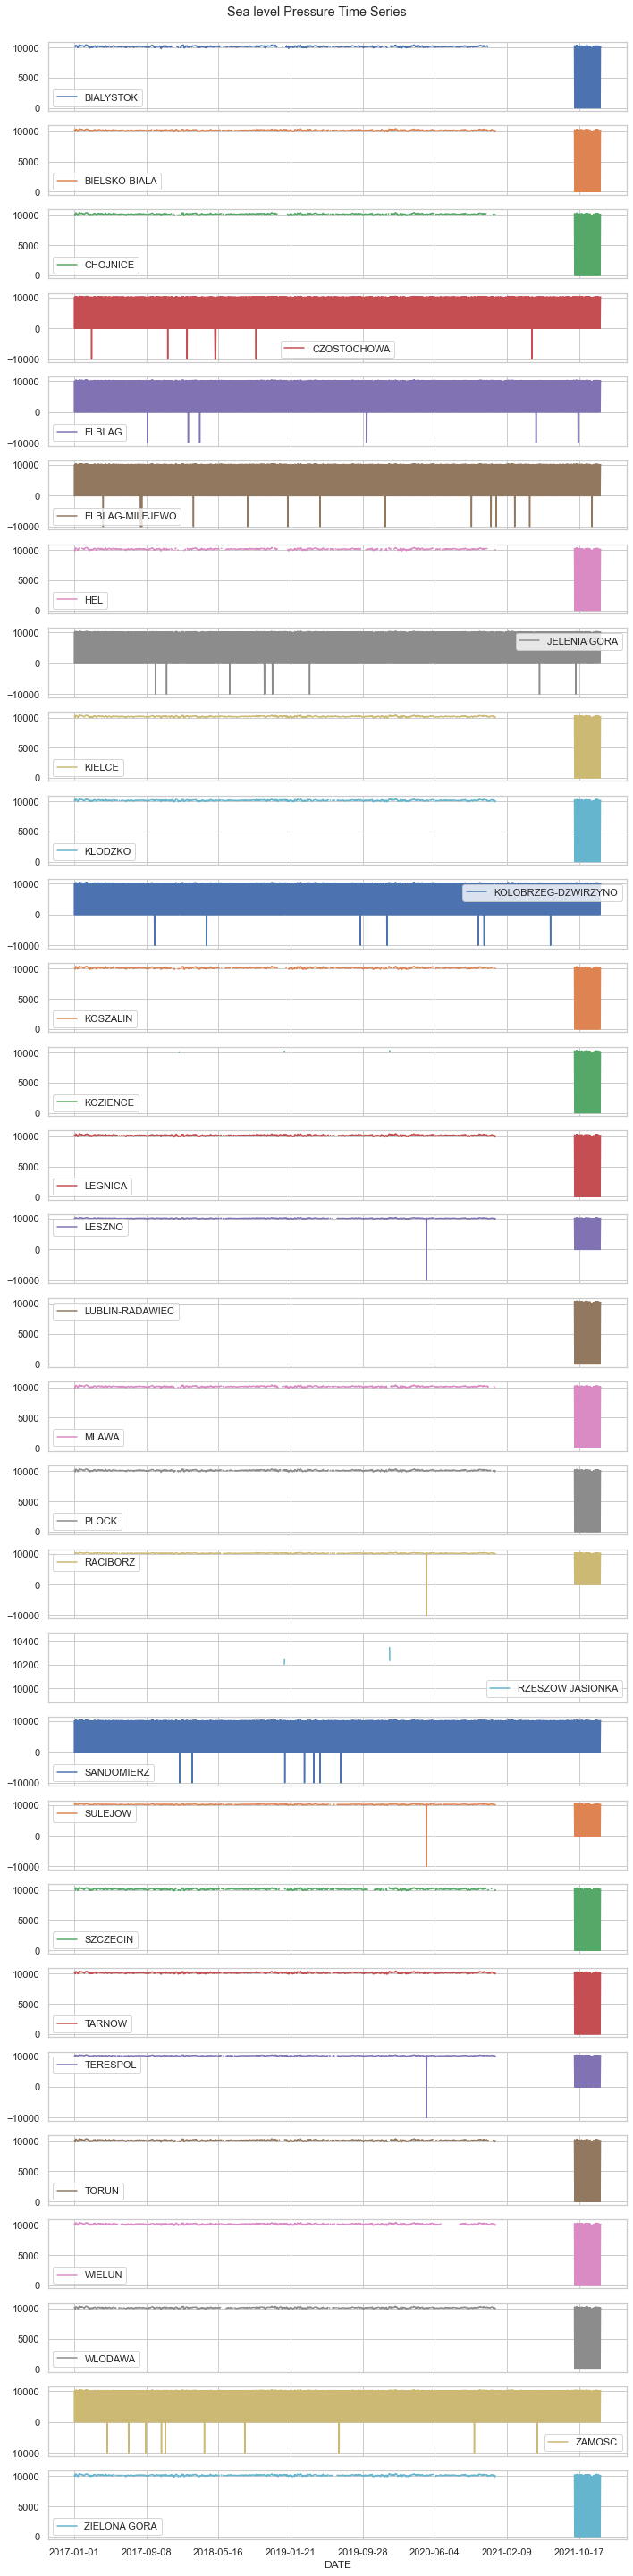

In [128]:
curr = "PP"
df_t = df.copy()
df_t.groupby(['SOUNAME', 'DATE'])[curr].mean().\
        unstack('SOUNAME').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle(f"{pars_dict[curr]} Time Series",  y=1)
plt.tight_layout()

### Global radiation 

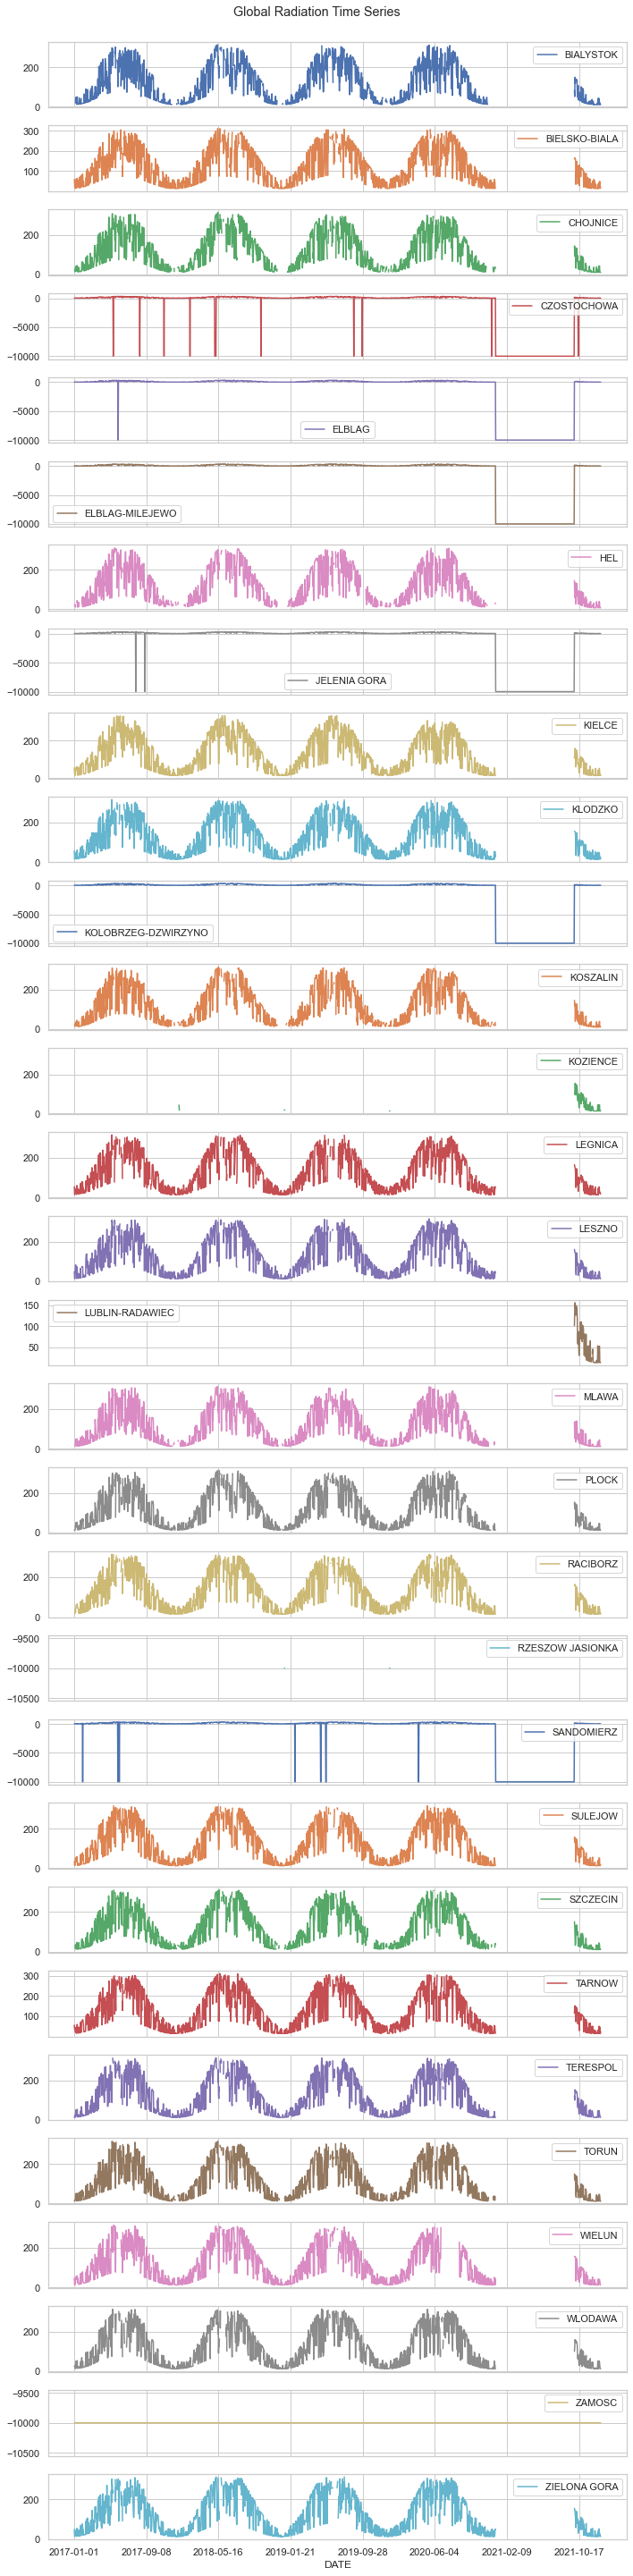

In [129]:
curr = "QQ"
df_t = df.copy()
df_t.groupby(['SOUNAME', 'DATE'])[curr].mean().\
        unstack('SOUNAME').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle(f"{pars_dict[curr]} Time Series",  y=1)
plt.tight_layout()

### Precipitation 

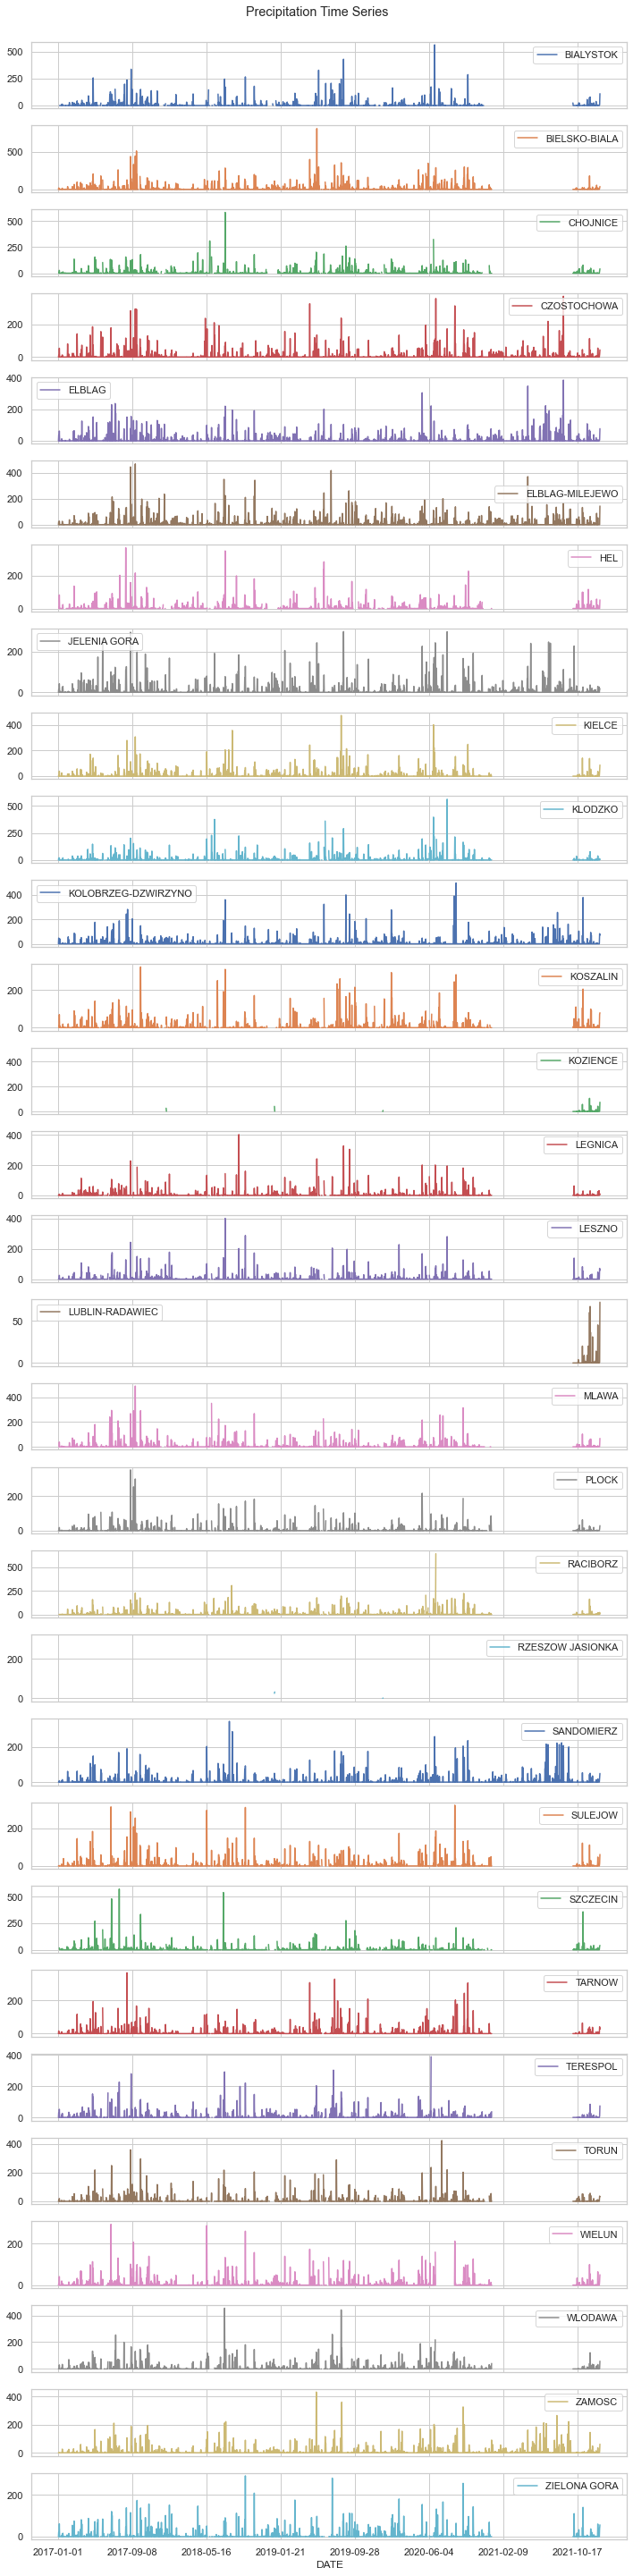

In [130]:
curr = "RR"
df_t = df.copy()
df_t.groupby(['SOUNAME', 'DATE'])[curr].mean().\
        unstack('SOUNAME').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle(f"{pars_dict[curr]} Time Series",  y=1)
plt.tight_layout()

### Snow depth 

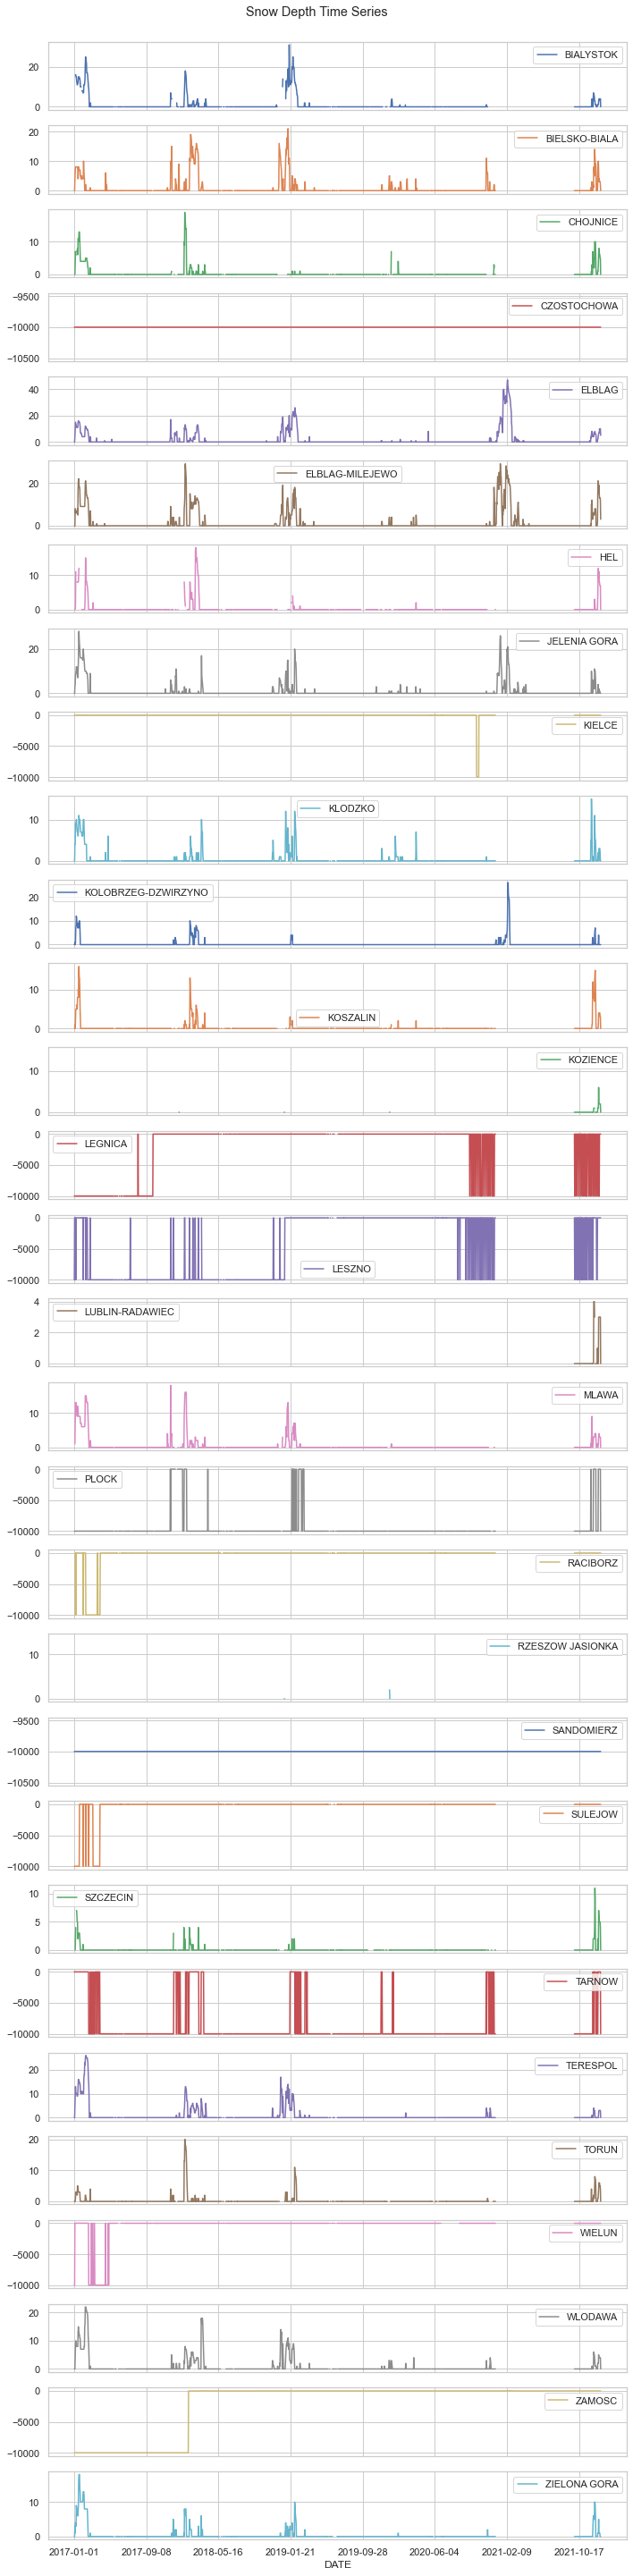

In [131]:
curr = "SD"
df_t = df.copy()
df_t.groupby(['SOUNAME', 'DATE'])[curr].mean().\
        unstack('SOUNAME').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle(f"{pars_dict[curr]} Time Series",  y=1)
plt.tight_layout()

### Sunshine 

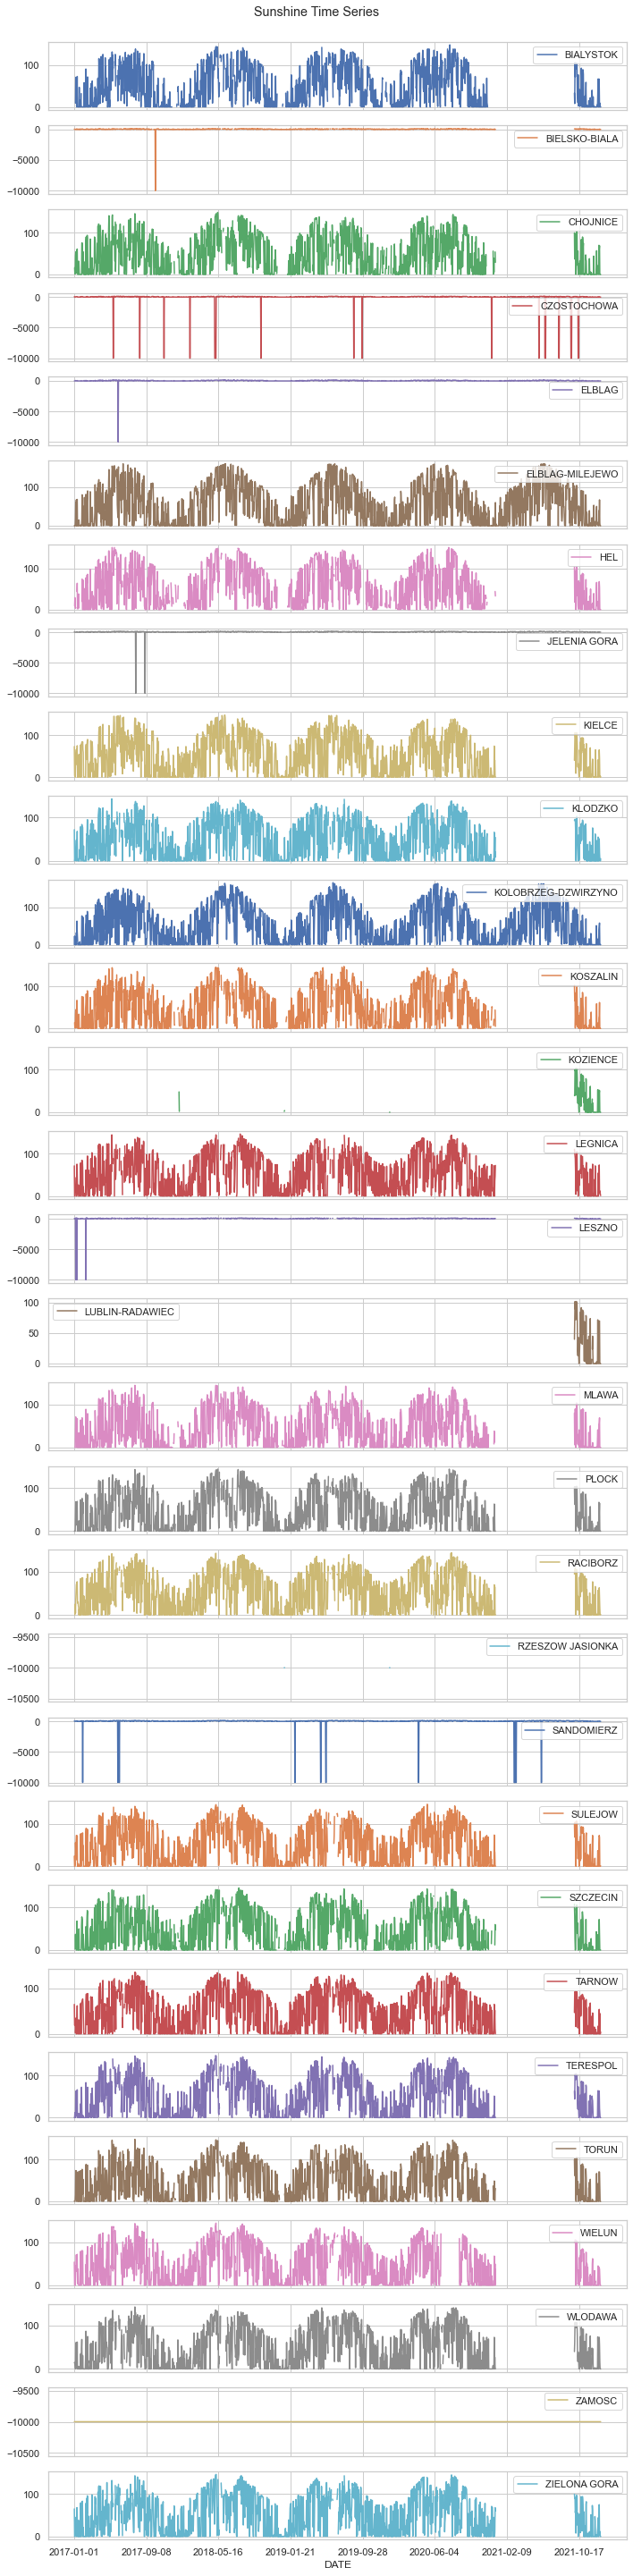

In [132]:
curr = "SS"
df_t = df.copy()
df_t.groupby(['SOUNAME', 'DATE'])[curr].mean().\
        unstack('SOUNAME').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle(f"{pars_dict[curr]} Time Series",  y=1)
plt.tight_layout()

### Mean Temperature 

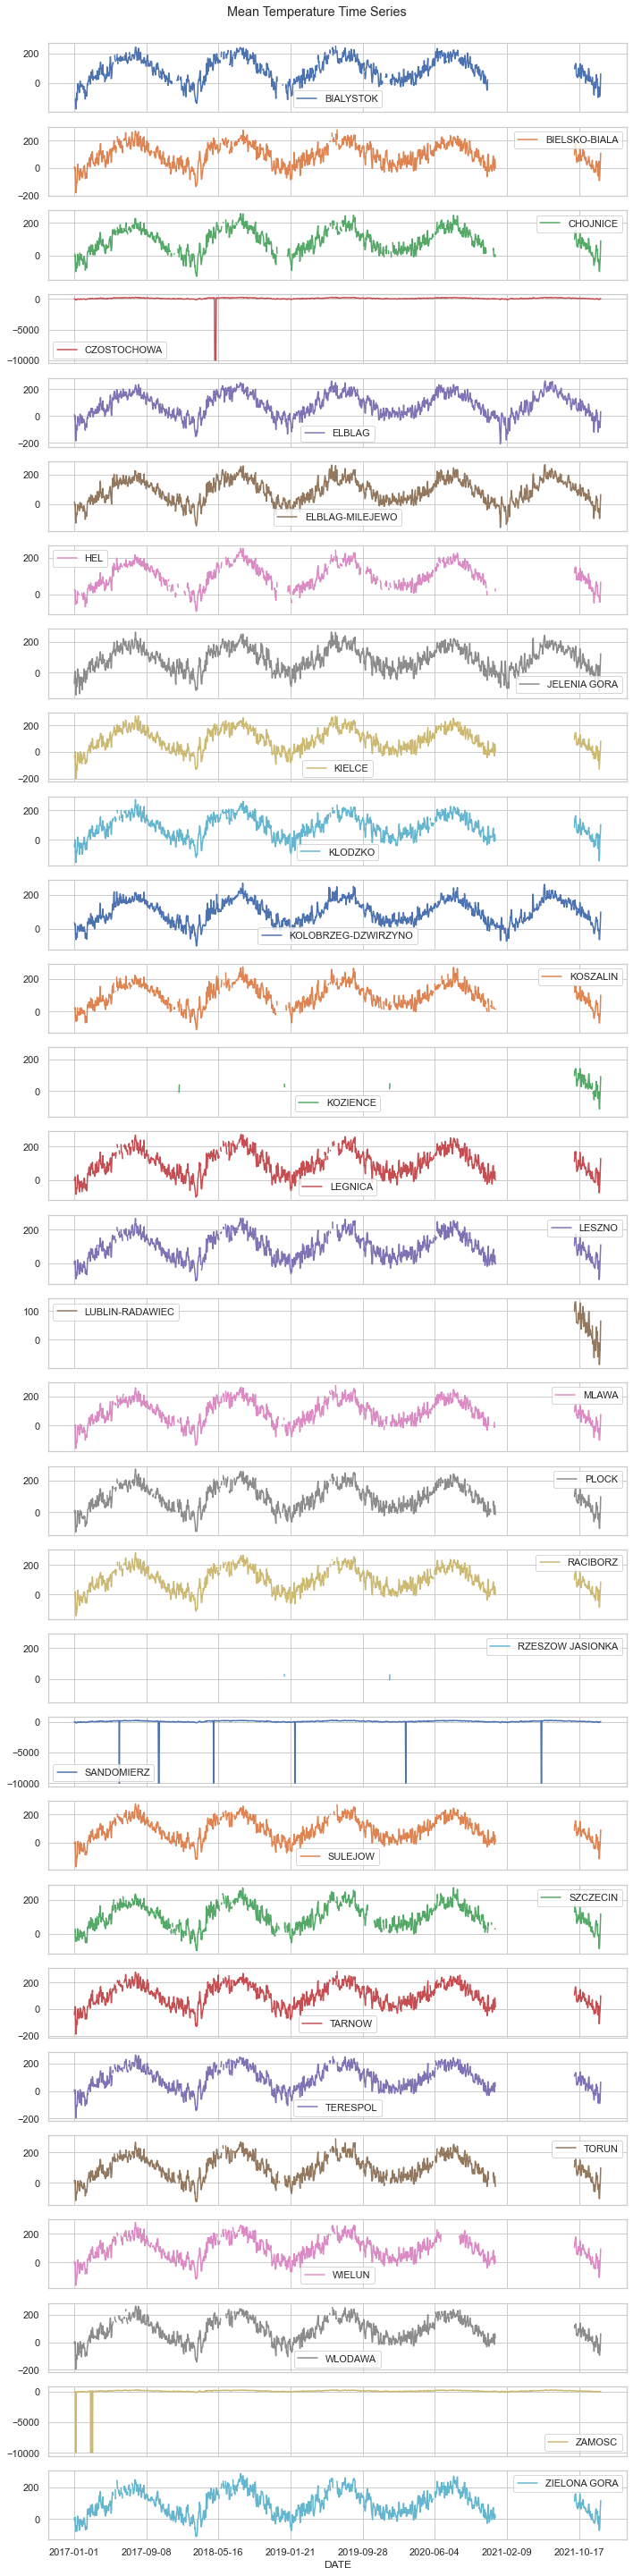

In [133]:
curr = "TG"
df_t = df.copy()
df_t.groupby(['SOUNAME', 'DATE'])[curr].mean().\
        unstack('SOUNAME').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle(f"{pars_dict[curr]} Time Series",  y=1)
plt.tight_layout()

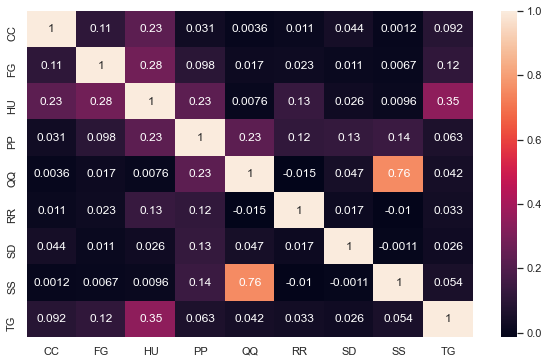

In [104]:
#corellation heatmap
plt.figure(figsize=(10, 6))
sns.set_theme(style= "whitegrid")
sns.heatmap(df_corr.corr(), annot=True)  
plt.show()


In [152]:
ndf = df.copy()
ndf

SOUID        DATE  CC  Q_CC  STAID          SOUNAME        LAT  \
0      240746  2017-01-03   7     0    204        BIALYSTOK  53.107222   
1      240746  2017-01-05   6     0    204        BIALYSTOK  53.107222   
2      240746  2017-01-06   1     0    204        BIALYSTOK  53.107222   
3      240746  2017-01-07   2     0    204        BIALYSTOK  53.107222   
4      240746  2017-01-08   6     0    204        BIALYSTOK  53.107222   
...       ...         ...  ..   ...    ...              ...        ...   
43293  240267  2021-12-27   2     0  25151  ELBLAG-MILEJEWO  54.223056   
43294  240267  2021-12-28   4     0  25151  ELBLAG-MILEJEWO  54.223056   
43295  240267  2021-12-29   8     0  25151  ELBLAG-MILEJEWO  54.223056   
43296  240267  2021-12-30   8     0  25151  ELBLAG-MILEJEWO  54.223056   
43297  240267  2021-12-31   8     0  25151  ELBLAG-MILEJEWO  54.223056   

             LON  FG  Q_FG  ...  QQ  Q_QQ   RR  Q_RR  SD  Q_SD  SS  Q_SS   TG  \
0      23.162222   0     0  ...  18     0    0     0   1     0   7     0  -14   
1      23.162222   0     0  ...  20     0    0     0  16     0   9     0 -108   
2      23.162222  25     0  ...  48     0    0     0  16     0  71     0 -174   
3      23.162222   0     0  ...  45     0    0     0  15     0  61     0 -178   
4      23.162222  10     0  ...  33     0    0     0  15     0  32     0 -125   
...          ...  ..   ...  ...  ..   ...  ...   ...  ..   ...  ..   ...  ...   
43293  19.543611   0     0  ...  39     0    0     0  13     0  67     0  -99   
43294  19.543611  61     0  ...  17     0    0     0  13     0   7     0  -87   
43295  19.543611   0     0  ...   9     0    0     0  13     0   0     0  -37   
43296  19.543611  51     0  ...   9     0    1     0  12     0   0     0    5   
43297  19.543611  58     0  ...  10     0  144     0   3     0   0     0   63   

       Q_TG  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
43293     0  
43294     0  
43295     0  
43296     0  
43297     0  

[43298 rows x 24 columns]

In [153]:
ndf["DATE"] = pd.to_datetime(ndf["DATE"], format = "%Y-%m-%d")
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43298 entries, 0 to 43297
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   SOUID    43298 non-null  int64         
 1   DATE     43298 non-null  datetime64[ns]
 2   CC       43298 non-null  int64         
 3   Q_CC     43298 non-null  int64         
 4   STAID    43298 non-null  int64         
 5   SOUNAME  43298 non-null  object        
 6   LAT      43298 non-null  float64       
 7   LON      43298 non-null  float64       
 8   FG       43298 non-null  int64         
 9   Q_FG     43298 non-null  int64         
 10  HU       43298 non-null  int64         
 11  Q_HU     43298 non-null  int64         
 12  PP       43298 non-null  int64         
 13  Q_PP     43298 non-null  int64         
 14  QQ       43298 non-null  int64         
 15  Q_QQ     43298 non-null  int64         
 16  RR       43298 non-null  int64         
 17  Q_RR     43298 non-null  int64 

In [154]:
check = ndf[(ndf["DATE"] >= "2021-02-01") & (ndf["DATE"] >= "2021-08-01")]
check

SOUID       DATE  CC  Q_CC  STAID          SOUNAME        LAT  \
1300   240746 2021-10-01   5     0    204        BIALYSTOK  53.107222   
1301   240746 2021-10-02   6     0    204        BIALYSTOK  53.107222   
1302   240746 2021-10-03   2     0    204        BIALYSTOK  53.107222   
1303   240746 2021-10-04   5     0    204        BIALYSTOK  53.107222   
1304   240746 2021-10-05   1     0    204        BIALYSTOK  53.107222   
...       ...        ...  ..   ...    ...              ...        ...   
43293  240267 2021-12-27   2     0  25151  ELBLAG-MILEJEWO  54.223056   
43294  240267 2021-12-28   4     0  25151  ELBLAG-MILEJEWO  54.223056   
43295  240267 2021-12-29   8     0  25151  ELBLAG-MILEJEWO  54.223056   
43296  240267 2021-12-30   8     0  25151  ELBLAG-MILEJEWO  54.223056   
43297  240267 2021-12-31   8     0  25151  ELBLAG-MILEJEWO  54.223056   

             LON  FG  Q_FG  ...   QQ  Q_QQ   RR  Q_RR  SD  Q_SD   SS  Q_SS  \
1300   23.162222  10     0  ...   84     0   24     0   0     0   33     0   
1301   23.162222   0     0  ...   52     0    0     0   0     0    8     0   
1302   23.162222  28     0  ...  150     0    0     0   0     0  106     0   
1303   23.162222   0     0  ...  119     0    0     0   0     0   72     0   
1304   23.162222  43     0  ...  140     0    0     0   0     0   98     0   
...          ...  ..   ...  ...  ...   ...  ...   ...  ..   ...  ...   ...   
43293  19.543611   0     0  ...   39     0    0     0  13     0   67     0   
43294  19.543611  61     0  ...   17     0    0     0  13     0    7     0   
43295  19.543611   0     0  ...    9     0    0     0  13     0    0     0   
43296  19.543611  51     0  ...    9     0    1     0  12     0    0     0   
43297  19.543611  58     0  ...   10     0  144     0   3     0    0     0   

        TG  Q_TG  
1300    95     0  
1301   101     0  
1302   118     0  
1303   117     0  
1304   131     0  
...    ...   ...  
43293  -99     0  
43294  -87     0  
43295  -37     0  
43296    5     0  
43297   63     0  

[3091 rows x 24 columns]

In [148]:
ndf = ndf[list(pars_dict.keys())]
ndf

CC  FG  HU     PP  QQ   RR  SD  SS   TG
0       7   0   0  10090  18    0   1   7  -14
1       6   0   0  10101  20    0  16   9 -108
2       1  25  74  10350  48    0  16  71 -174
3       2   0   0  10337  45    0  15  61 -178
4       6  10  82  10299  33    0  15  32 -125
...    ..  ..  ..    ...  ..  ...  ..  ..  ...
43293   2   0   0      0  39    0  13  67  -99
43294   4  61  89  10106  17    0  13   7  -87
43295   8   0   0      0   9    0  13   0  -37
43296   8  51  98  10098   9    1  12   0    5
43297   8  58  99  10075  10  144   3   0   63

[43298 rows x 9 columns]